# GRIP: The Sparks Foundation

# gripaugust21

Author: Netra Kulkarni


Data Science and Business Analytics Intern

Task 1: Prediction using supervised ML


To Predict the percentage of an student based on the no. of study hours.

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading the dataset
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [46]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


to plot a scatter plot to see the distribution of scores

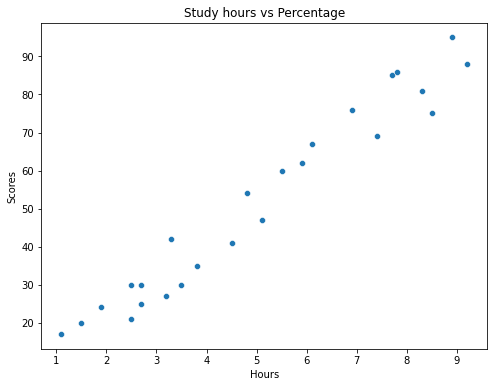

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Hours',y='Scores')
plt.title('Study hours vs Percentage')
plt.show()

From the graph above we can notice that there is positive linear relation between no. of hours studied and percentage scores

Now we will seperate the data as features and labels that is x and y

In [33]:
x = df.drop('Scores',axis=1)
y = df.Scores

Now we will fit a linear regression model

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

To plot the regression line

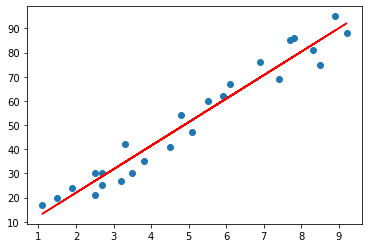

In [69]:
reg_line = model.coef_*x+model.intercept_

plt.scatter(x,y)
plt.plot(x,reg_line,color='red')
plt.show()

Making predictions

In [70]:
y_pred = model.predict(x_test)

In [71]:
# comparing actual vs predicted
df_new = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_new

,Actual,Predicted
16,30,26.845397
10,85,77.458594
22,35,39.498696
19,69,74.538601
7,60,56.045318


In [72]:
# What will be score if a student studies for 9.25 hours/day?
hours = np.array(9.25).reshape(1,-1)
score = model.predict(hours)
score
print(f'No. of hours = {hours[0][0]}')
print(f'Percentage score = {score[0]}')

No. of hours = 9.25
Percentage score = 92.5452195402996


Evaluating the model

In [73]:
# Root Mean Squared Error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

5.164846812544612

As mean value of scores is 51, error in predicted score 5.16 is 10.12% which states that fitting of our model is good.